In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
dataset_day = pd.read_csv(filepath_or_buffer="data/day.csv")
dataset_hour = pd.read_csv(filepath_or_buffer="data/hour.csv")

In [3]:
dataset_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
dataset_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


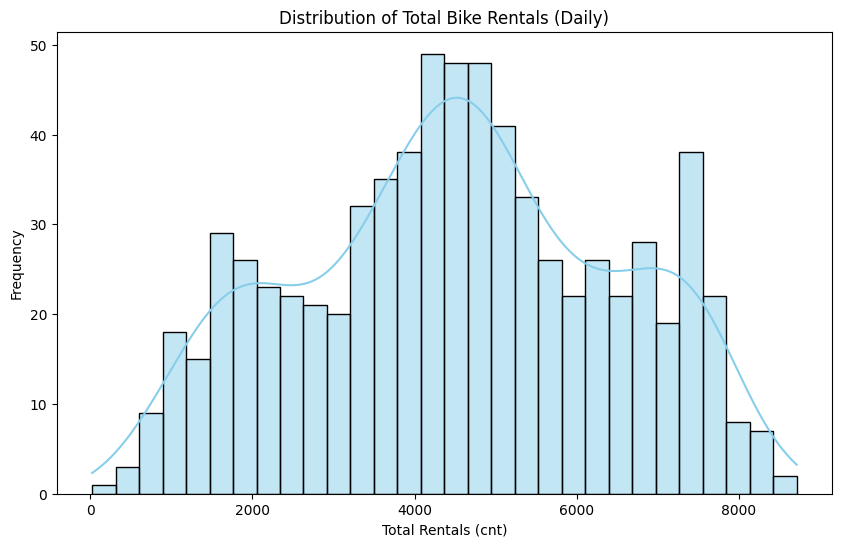

In [5]:
# 1. Distribution of Target Variable (cnt)
plt.figure(figsize=(10, 6))
sns.histplot(dataset_day['cnt'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Total Bike Rentals (Daily)')
plt.xlabel('Total Rentals (cnt)')
plt.ylabel('Frequency')
plt.show()


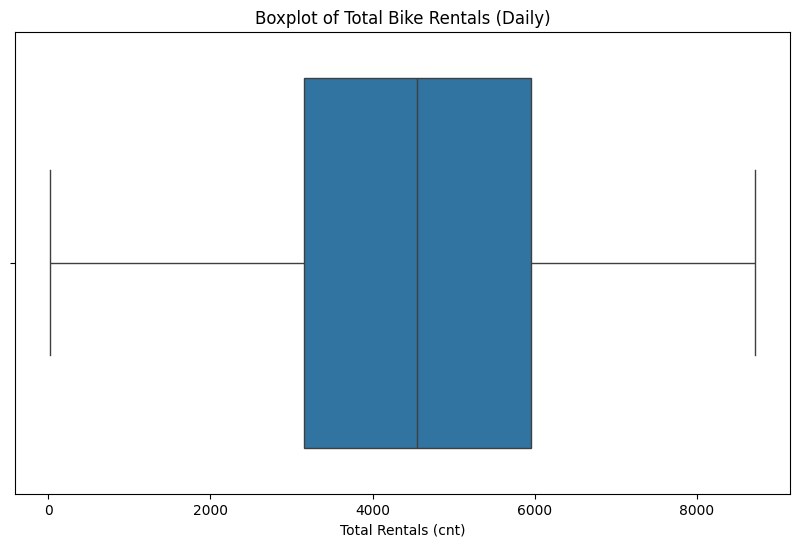

In [6]:

# Boxplot for cnt
plt.figure(figsize=(10, 6))
sns.boxplot(x='cnt', data=dataset_day)
plt.title('Boxplot of Total Bike Rentals (Daily)')
plt.xlabel('Total Rentals (cnt)')
plt.show()


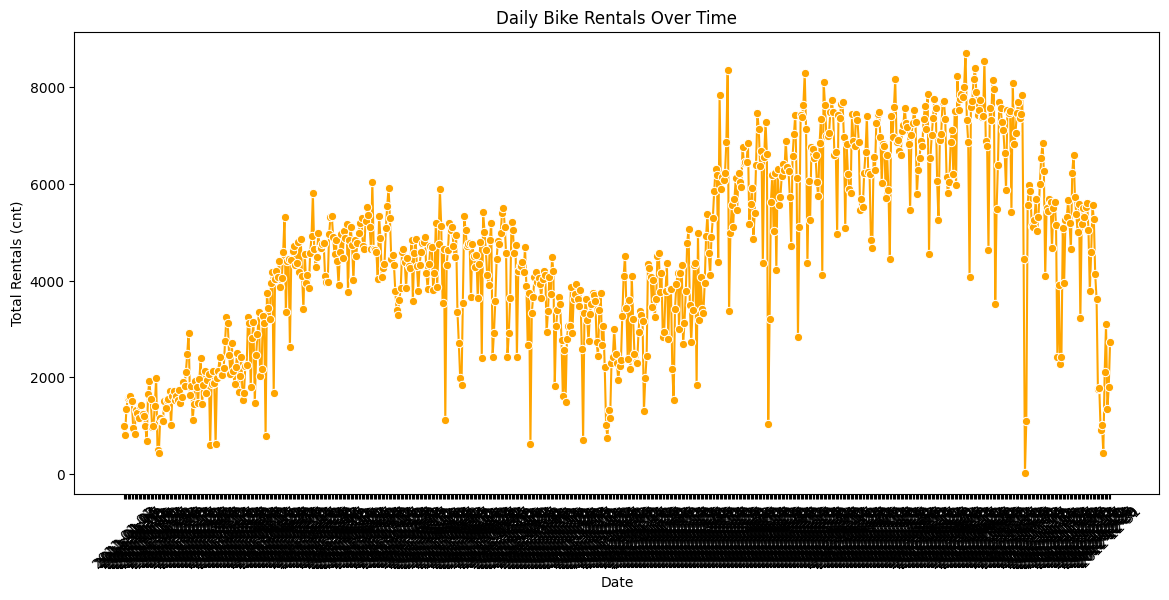

In [7]:
# 2. Temporal Analysis
# Line Plot - Daily Trend
plt.figure(figsize=(14, 6))
sns.lineplot(x='dteday', y='cnt', data=dataset_day, marker='o', color='orange')
plt.title('Daily Bike Rentals Over Time')
plt.xlabel('Date')
plt.ylabel('Total Rentals (cnt)')
plt.xticks(rotation=45)
plt.show()


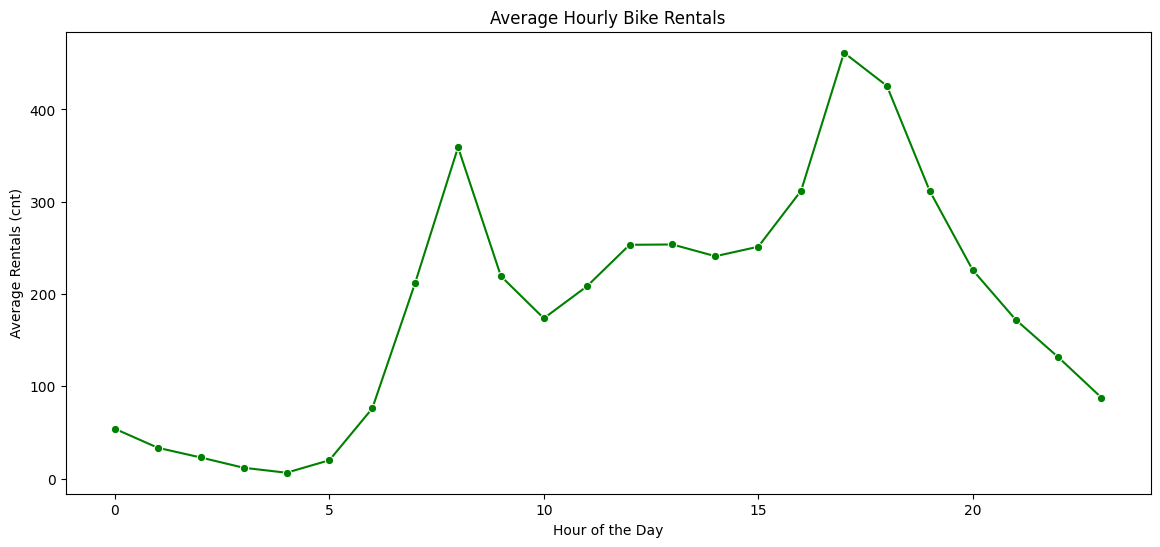

In [8]:
# Line Plot - Hourly Trend
plt.figure(figsize=(14, 6))
sns.lineplot(x='hr', y='cnt', data=dataset_hour.groupby('hr')['cnt'].mean().reset_index(), marker='o', color='green')
plt.title('Average Hourly Bike Rentals')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Rentals (cnt)')
plt.show()


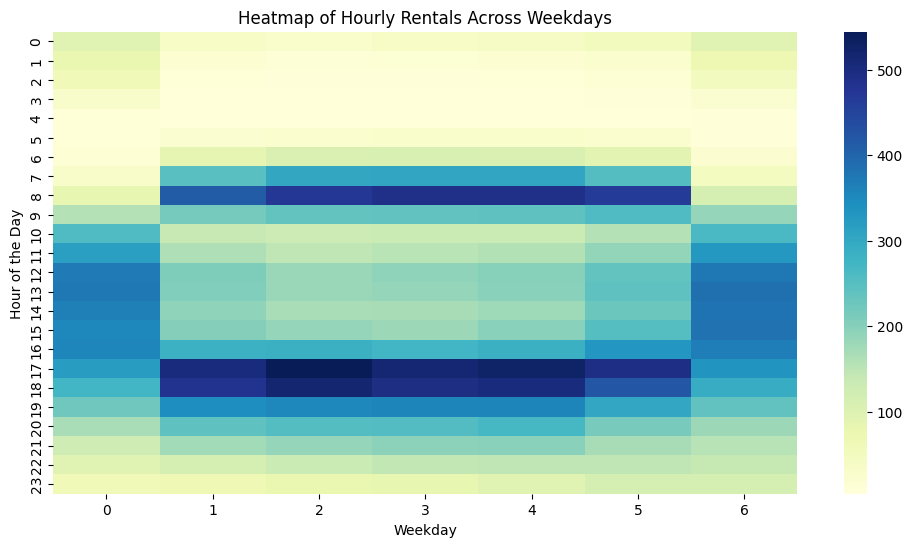

In [9]:
# Heatmap for Hourly Rentals across Weekdays
hourly_grouped = dataset_hour.groupby(['hr', 'weekday'])['cnt'].mean().unstack()
plt.figure(figsize=(12, 6))
sns.heatmap(hourly_grouped, cmap='YlGnBu')
plt.title('Heatmap of Hourly Rentals Across Weekdays')
plt.xlabel('Weekday')
plt.ylabel('Hour of the Day')
plt.show()


C:\Users\anany\AppData\Local\Temp\ipykernel_18096\815793226.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='season', y='cnt', data=dataset_day, palette='Set2')


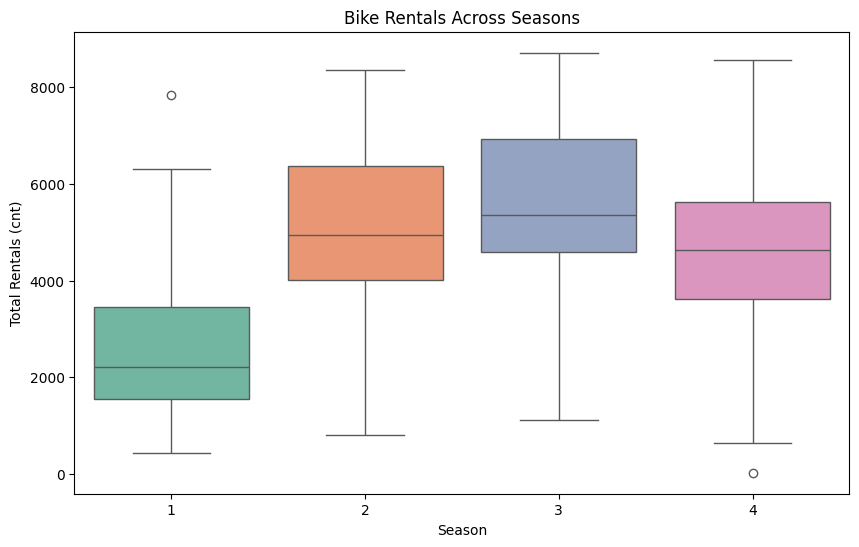

In [10]:
# 3. Seasonality and Trends
# Boxplot by Season
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='cnt', data=dataset_day, palette='Set2')
plt.title('Bike Rentals Across Seasons')
plt.xlabel('Season')
plt.ylabel('Total Rentals (cnt)')
plt.show()


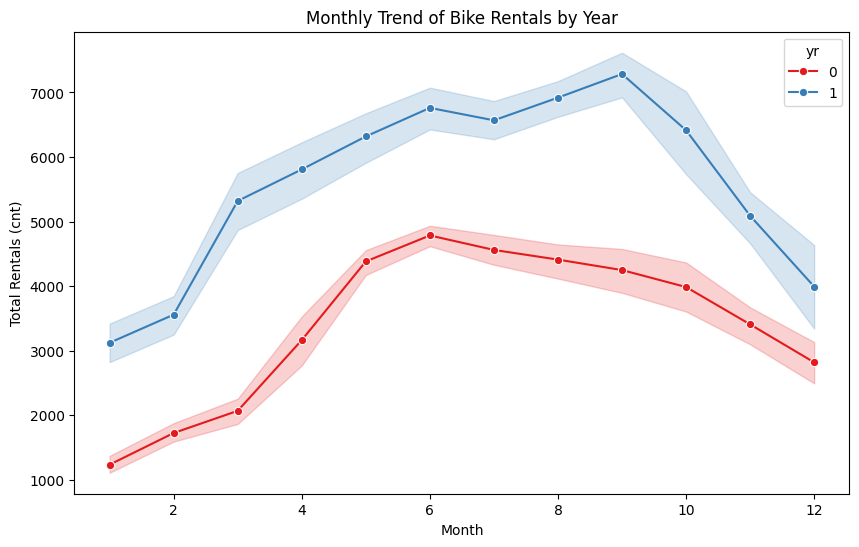

In [11]:
# Line Plot for Yearly Trend
plt.figure(figsize=(10, 6))
sns.lineplot(x='mnth', y='cnt', hue='yr', data=dataset_day, marker='o', palette='Set1')
plt.title('Monthly Trend of Bike Rentals by Year')
plt.xlabel('Month')
plt.ylabel('Total Rentals (cnt)')
plt.show()


C:\Users\anany\AppData\Local\Temp\ipykernel_18096\328341449.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='weathersit', y='cnt', data=dataset_day, palette='muted')


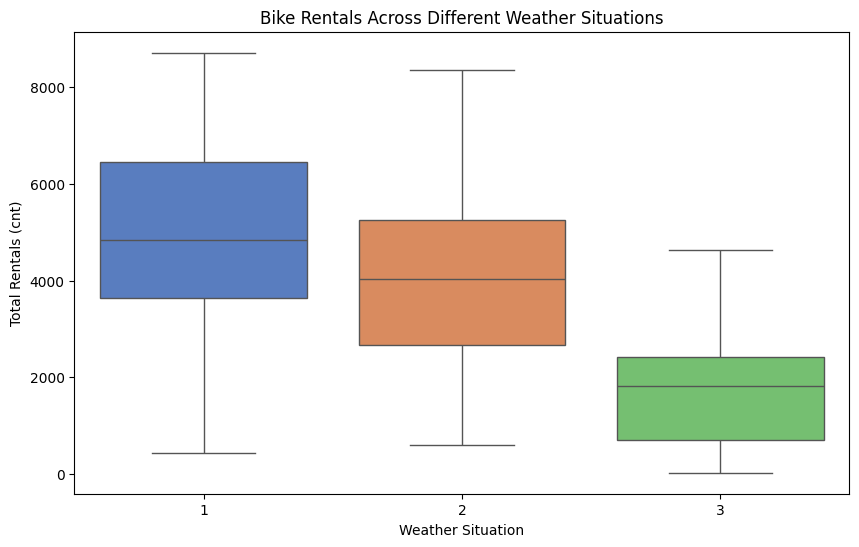

In [12]:
# 4. Weather Impact
# Boxplot by weathersit
plt.figure(figsize=(10, 6))
sns.boxplot(x='weathersit', y='cnt', data=dataset_day, palette='muted')
plt.title('Bike Rentals Across Different Weather Situations')
plt.xlabel('Weather Situation')
plt.ylabel('Total Rentals (cnt)')
plt.show()

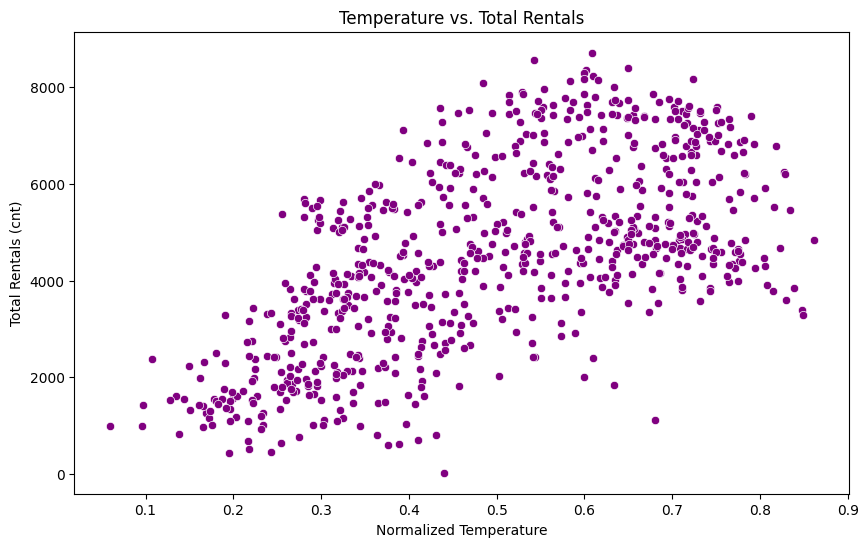

In [13]:
# Scatter Plot for temp vs cnt
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', data=dataset_day, color='purple')
plt.title('Temperature vs. Total Rentals')
plt.xlabel('Normalized Temperature')
plt.ylabel('Total Rentals (cnt)')
plt.show()


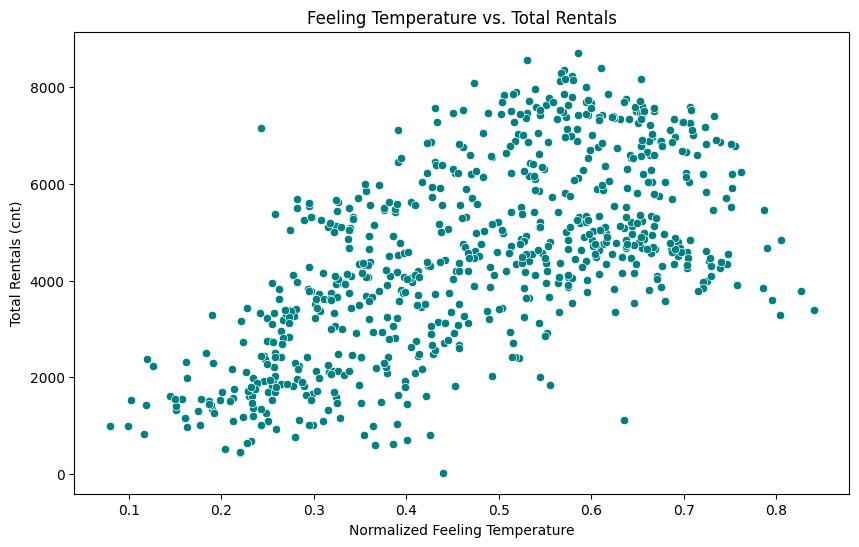

In [14]:
# Scatter Plot for atemp vs cnt
plt.figure(figsize=(10, 6))
sns.scatterplot(x='atemp', y='cnt', data=dataset_day, color='teal')
plt.title('Feeling Temperature vs. Total Rentals')
plt.xlabel('Normalized Feeling Temperature')
plt.ylabel('Total Rentals (cnt)')
plt.show()



C:\Users\anany\AppData\Local\Temp\ipykernel_18096\242219157.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Casual', 'Registered'], y=[dataset_day['casual'].sum(), dataset_day['registered'].sum()], palette='pastel')


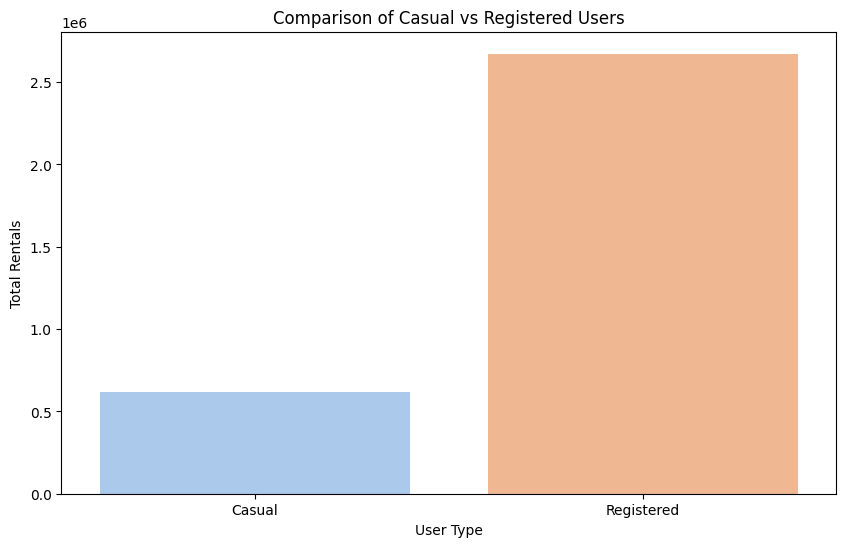

In [15]:
# 5. User Type Analysis
# Bar Plot for casual vs registered
plt.figure(figsize=(10, 6))
sns.barplot(x=['Casual', 'Registered'], y=[dataset_day['casual'].sum(), dataset_day['registered'].sum()], palette='pastel')
plt.title('Comparison of Casual vs Registered Users')
plt.xlabel('User Type')
plt.ylabel('Total Rentals')
plt.show()



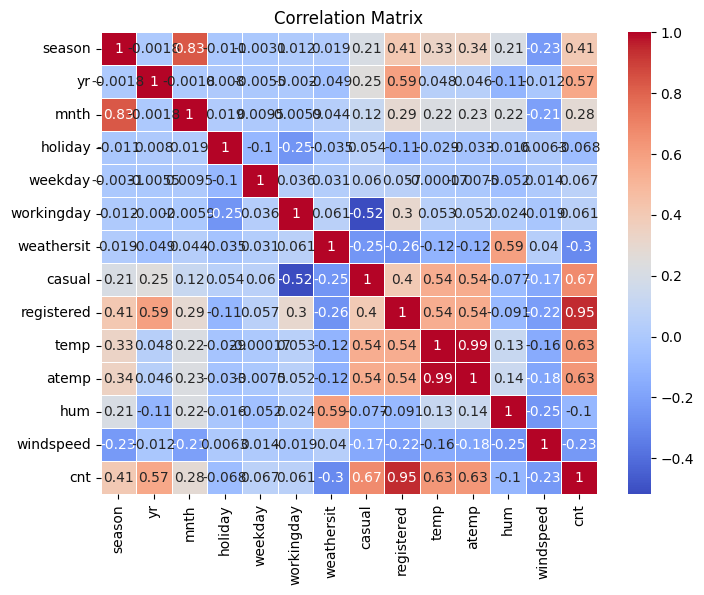

In [16]:
# 6. Correlation Analysis
# Correlation Matrix
corr_matrix = dataset_day[['season','yr','mnth','holiday','weekday','workingday','weathersit','casual','registered' ,'temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [17]:
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


In [51]:
# Load the dataset
day_data = pd.read_csv('data/day.csv')



In [ ]:
# Prepare features and target variable
X_day = day_data.drop(columns=['instant', 'dteday', 'casual', 'registered', 'cnt'])
y_day = day_data['cnt']



In [ ]:
# Split the dataset into training and testing sets
X_train_day, X_test_day, y_train_day, y_test_day = train_test_split(X_day, y_day, test_size=0.2, random_state=42)



In [ ]:
# Standardize the data
scaler_day = StandardScaler()
X_train_day = scaler_day.fit_transform(X_train_day)
X_test_day = scaler_day.transform(X_test_day)



In [ ]:
# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train_day, y_train_day)




In [54]:
# Predict and evaluate
y_pred_day = model.predict(X_test_day)
r2_day = r2_score(y_test_day, y_pred_day)

#Calculate additional metrics
mae_day = mean_absolute_error(y_test_day, y_pred_day)
mse_day = mean_squared_error(y_test_day, y_pred_day)
rmse_day = np.sqrt(mse_day)

# Print the results
print(f'Model Stats: \nR² Score: {r2_day}\nMean Absolute Error (MAE): {mae_day}\nMean Squared Error (MSE): {mse_day}\nRoot Mean Squared Error (RMSE): {rmse_day}')

Model Stats: 
R² Score: 0.8276670090367212
Mean Absolute Error (MAE): 617.3930656443374
Mean Squared Error (MSE): 691035.0082022654
Root Mean Squared Error (RMSE): 831.2851545662688


In [56]:
import joblib
joblib.dump(value=model, filename="Model.pkl")

['Model.pkl']